In [27]:
# pip install pandas

In [28]:
# pip install numpy

In [29]:
# pip install sqlalchemy

In [30]:
# pip install geopy

In [31]:
# pip install psycopg2

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory = False)

In [34]:
df.shape

(102599, 26)

In [35]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [36]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

* droping the Country and Country Code columns because there are only United States and US

In [38]:
print(df["country"].unique())
print(df["country code"].unique())
df.drop(columns = ["country", "country code"], inplace = True)

['United States' nan]
['US' nan]


* dropng the license column because there are only two values ​​in this column and 2 of them are not null

In [39]:
print(df["license"].unique())
df["license"].value_counts()
df.drop(columns = ["license"], inplace = True)

[nan '41662/AL']


* column name processing

In [40]:
def clean_name(x):
    ls = []
    for name in x:
        ls.append(name.replace(" ", "_").lower())
    return ls
    
df.columns = clean_name(df.columns) 

In [80]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [41]:
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)
df['service_fee'] =df['service_fee'].str.replace(',', '').str.replace('$', '').astype(float)

* cast to the correct datatypes

In [42]:
df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce').astype('Int32')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce').astype('Int32')
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce').astype('Int32')
df['last_review'] = pd.to_datetime(df['last_review'], format='%m/%d/%Y', errors='coerce')
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1900-01-01'))
df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'], errors='coerce')
df['review_rate_number'] = pd.to_numeric(df['review_rate_number'], errors='coerce').astype('Int32')
df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce').astype('Int32')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce').astype('Int32')
df['instant_bookable'] = df['instant_bookable'].replace('nan', pd.NA)
df = df.replace(r'\n', ' ', regex=True)
df = df.replace(r"'", '', regex=True)
df['host_identity_verified'] = df['host_identity_verified'].astype(str).replace({'unconfirmed' : False, 'verified': True})
df['host_identity_verified'] = df['host_identity_verified'].replace('nan', pd.NA)

* check and drop duplicates

In [43]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

541


In [44]:
# exclude_cols = ["id", "host_id", "calculated_host_listings_count", "cancellation_policy",
#                 "instant_bookable", "host_identity_verified"]

# duplicates = df[df.duplicated(subset=df.columns.difference(exclude_cols), keep='first')]

# df.drop_duplicates(subset=df.columns.difference(exclude_cols), keep='first', inplace=True)

In [45]:
# df.drop_duplicates(subset=['lat', 'long'], keep='first', inplace=True)

In [46]:
# df.shape

* Corellation matrix

In [47]:
filtr = df.copy()

In [48]:
filtr.drop(columns = ['host_name','house_rules','neighbourhood','id', 'name', 'host_id', 'last_review'],inplace = True)

In [49]:
filtr['host_identity_verified'] = filtr['host_identity_verified'].map({True: 1, False: 0})
filtr['instant_bookable'] = filtr['instant_bookable'].map({True: 1, False: 0})

In [50]:
filtr['neighbourhood_group'] = filtr['neighbourhood_group'].replace({
    'manhatan': 'Manhattan',
    'brookln': 'Brooklyn'
})
df_encoded = pd.get_dummies(filtr, columns=['neighbourhood_group', 'room_type','cancellation_policy'])
boolean_columns = df_encoded.select_dtypes(include=bool).columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

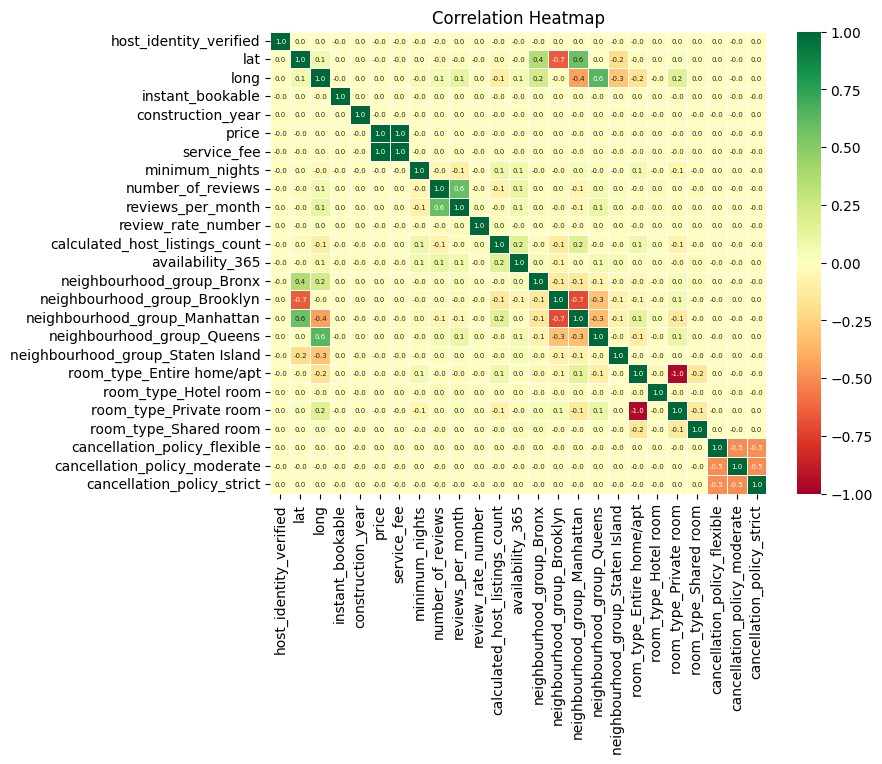

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix , annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt=".1f", annot_kws={"size":5}, linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

In [52]:
df.isnull().sum()

id                                    0
name                                250
host_id                               0
host_identity_verified              289
host_name                           404
neighbourhood_group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room_type                             0
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      400
number_of_reviews                   183
last_review                           0
reviews_per_month                 15818
review_rate_number                  319
calculated_host_listings_count      319
availability_365                    448
house_rules                       51842
dtype: int64

* if minimum nights null or less than 0,then fill it 1

In [53]:
df['minimum_nights'].fillna(1, inplace=True)
df.loc[df['minimum_nights'] < 0, 'minimum_nights'] = 1

* if name column is null,fill "Noname"

In [54]:
df['name'].fillna("Noname", inplace=True)

* if host_name column is null,fill "Nohostname"

In [55]:
df['host_name'].fillna("Nohostname", inplace=True)

* processing the 'neighbourhood_group'  column

In [56]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [57]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace({
    'manhatan': 'Manhattan',
    'brookln': 'Brooklyn'
})

* fill null values of neighborhood_group column using neighborhood

In [58]:
def find_neighborhood_group(row):
    neighborhood = row['neighbourhood']
    my_dict = {
        'Brooklyn': ['Kensington', 'Clinton Hill', 'Bedford-Stuyvesant', 'South Slope', 'Williamsburg', 'Fort Greene', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Greenpoint', 'Bushwick', 'Flatbush', 'Prospect-Lefferts Gardens', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Boerum Hill', 'DUMBO', 'Prospect Heights', 'Red Hook', 'Sunset Park', 'Greenwood Heights', 'Columbia St', 'Downtown Brooklyn', 'Midwood', 'Bergen Beach', 'Brownsville', 'Canarsie', 'Coney Island', 'Sea Gate', 'Dyker Heights', 'East New York', 'Flatlands', 'Fort Hamilton', 'Georgetown', 'Gravesend', 'Homecrest', 'Madison', 'Manhattan Beach', 'Marine Park', 'Midwood', 'Mill Basin', 'Ocean Hill', 'Ocean Parkway', 'Paerdegat Basin', 'Sheepshead Bay', 'South Side', 'Spring Creek', 'Starrett City', 'Vinegar Hill', 'Weeksville', 'Williamsburg', 'Windsor Terrace'],
        'Manhattan': ['Midtown', 'Harlem', 'East Harlem', 'Murray Hill', 'Hells Kitchen', 'Upper West Side', 'Chinatown', 'West Village', 'Upper East Side', 'Washington Heights', 'Chelsea', 'Lower East Side', 'SoHo', 'Greenwich Village', 'Little Italy', 'Tribeca', 'Financial District', 'Battery Park City', 'Civic Center', 'Nolita', 'Civic Center', 'Noho', 'Civic Center', 'Lenox Hill', 'Clinton', 'Sutton Place', 'Midtown East', 'Midtown West', 'Morningside Heights', 'Gramercy', 'Battery Park City', 'Upper East Side', 'Battery Park City', 'Central Park','East Village'],
        'Queens': ['Long Island City', 'Woodside', 'Sunnyside', 'Jackson Heights', 'Elmhurst', 'East Elmhurst', 'Howard Beach', 'Corona', 'Forest Hills', 'Kew Gardens', 'Richmond Hill', 'Flushing', 'College Point', 'Whitestone', 'Bayside', 'Auburndale', 'Little Neck', 'Douglaston', 'Glen Oaks', 'Bellerose', 'Fresh Meadows', 'Briarwood', 'Jamaica Center', 'Hollis', 'South Ozone Park', 'Springfield Gardens', 'Cambria Heights', 'Rosedale', 'Queens Village', 'Jamaica', 'Rockaway Beach', 'Far Rockaway', 'Breezy Point', 'Jamaica Estates', 'Hillcrest', 'Clearview', 'Oakland Gardens', 'Ridgewood', 'Glendale', 'Middle Village', 'Rego Park', 'Woodhaven', 'Ozone Park', 'South Jamaica', 'Springfield Gardens', 'South Laurelton', 'Rosedale', 'Saint Albans', 'Brookville', 'Springfield Gardens', 'Rochdale Village'],
        'Staten Island': ['St. George', 'Shore Acres', 'Stapleton', 'Rosebank', 'West Brighton', 'Grymes Hill', 'Todt Hill', 'South Beach', 'Port Richmond', 'Mariners Harbor', 'Port Ivory', 'Castleton Corners', 'New Springville', 'Travis', 'New Dorp', 'Oakwood', 'Great Kills', 'Eltingville', 'Annadale', 'Woodrow', 'Tottenville', 'Richmond Valley', 'Charleston', 'Rossville', 'Arden Heights', 'Greenridge', 'Heartland Village', 'Chelsea', 'Bloomfield', 'Bulls Head', 'New Brighton', 'Grymes Hill', 'Randall Manor', 'Silver Lake', 'Tompkinsville', 'Rosebank', 'Shore Acres', 'Silver Lake', 'Sunnyside', 'Clifton', 'Concord', 'Castleton Corners', 'Emerson Hill', 'Grymes Hill', 'Dongan Hills'],
        'Bronx': ['Riverdale', 'Kingsbridge', 'Marble Hill', 'Woodlawn', 'Norwood', 'Fordham', 'East Tremont', 'West Farms', 'Highbridge', 'Melrose', 'Mott Haven', 'Port Morris', 'Longwood', 'Hunts Point', 'Morrisania', 'Soundview', 'Clason Point', 'Throgs Neck', 'Country Club', 'Parkchester', 'Westchester Square', 'Van Nest', 'Morris Park', 'Belmont', 'Spuyten Duyvil', 'North Riverdale', 'Pelham Bay', 'Schuylerville', 'Edgewater Park', 'Castle Hill', 'Olinville', 'Pelham Gardens', 'Concourse', 'Unionport', 'Edenwald', 'Baychester', 'City Island', 'Hunts Point', 'Eastchester', 'Williamsbridge', 'Baychester', 'Bronxdale', 'Allerton', 'Unionport', 'Wakefield', 'Co-op City', 'Pelham Bay', 'Throgs Neck']
        }

    for group,neighborhoods in my_dict.items():
        if neighborhood in neighborhoods:
            return group
    return row['neighbourhood_group']

In [59]:
df['neighbourhood_group'] = df.apply(find_neighborhood_group, axis=1)

* fill missing values of neighborhood column using neighborhood_group

In [60]:
df['neighbourhood'].fillna(df['neighbourhood_group'], inplace = True)

* fill missing values in 'cancellation_policy' with the most frequent value in each 'neighbourhood' group.

In [61]:
df['cancellation_policy'] = df.groupby(['neighbourhood'])['cancellation_policy'].transform(lambda x: x.fillna(x.mode()[0]))

* Fill missing values in 'construction_year' with the most frequent value within each 'neighbourhood' and 'room_type' group.
* Update the year in last_review and construction year to the current year if it's greater than the current year

In [62]:
import datetime

current_year = datetime.datetime.now().year

# Update the year in last_review to the current year if it's greater than the current year
df.loc[df['last_review'].dt.year > current_year, 'last_review'] = df['last_review'].apply(
    lambda x: x.replace(year=current_year) if x.year > current_year else x
)

df['construction_year'] = df.groupby(['neighbourhood','room_type'])['construction_year'].transform(lambda x: x.fillna(x.mode()[0]))
df.loc[df['construction_year'] > current_year, 'construction_year'] = current_year

* fill missing values in 'review_rate_number' with the most frequent value within each 'neighbourhood','cancellation_policy' and 'room_type' group.

In [63]:
df['review_rate_number'] =  df.groupby(['neighbourhood','room_type','cancellation_policy'])['review_rate_number'].transform(lambda x: x.fillna(x.mode()[0]))

* fill missing values in 'price' with the median price within each 'neighbourhood', 'room_type', and 'cancellation_policy' group.

In [64]:
prices = df.groupby(['neighbourhood', 'room_type','cancellation_policy'])['price'].transform('median')
df['price'] = df['price'].fillna(prices)

* Fill missing values in 'service_fee' with the median service fee within each 'neighbourhood', 'room_type', and 'cancellation_policy' group.


In [65]:
service = df.groupby(['neighbourhood', 'room_type','cancellation_policy'])['service_fee'].transform('median')
df['service_fee'] = df['service_fee'].fillna(service)

* Fill missing values in 'host_identity_verified' with the most frequent value within each 'neighbourhood' and 'room_type' group.


In [66]:
df['host_identity_verified'] = df.groupby(['neighbourhood', 'room_type'])['host_identity_verified'].transform(lambda x: x.fillna(x.mode()[0]))

* Fill missing values in 'instant_bookable' with the most frequent value within each 'neighbourhood' and 'room_type' group.


In [67]:
df['instant_bookable'] = df.groupby(['neighbourhood', 'room_type'])['instant_bookable'].transform(lambda x: x.fillna(x.mode()[0]))

* Fill missing values in 'house_rules' with the string "Unknown".


In [68]:
df["house_rules"] = df["house_rules"].fillna("Unknown")

* Fill missing values in 'calculated_host_listings_count' with the median count within each 'neighbourhood_group' and 'room_type' group.


In [69]:
count = df.groupby(['neighbourhood_group','room_type'])['calculated_host_listings_count'].transform('median')
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(count)

* Ensure 'availability_365' values are corrected:
* Cap values greater than 365 to 365
* Convert negative values to their absolute value
* Fill missing values in 'availability_365' with the most frequent value within each 'neighbourhood' and 'room_type' group.up.


In [70]:
df['availability_365'] = df['availability_365'].apply(
    lambda x: 365 if pd.notna(x) and x > 365 else (abs(x) if pd.notna(x) and x < 0 else x)
)
df['availability_365'] = df.groupby(['neighbourhood', 'room_type'])['availability_365'].transform(lambda x: x.fillna(x.mode()[0]))

* Using geopy's Nominatim to fetch latitude and longitude coordinates for missing values.


In [71]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def get_lat_long(neighbourhood):
    location = geolocator.geocode(neighbourhood)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Identify rows with missing lat/long values
missing_coords = df[df['lat'].isnull() | df['long'].isnull()]

# Update the missing lat/long values
for index, row in missing_coords.iterrows():
    lat, long = get_lat_long(row['neighbourhood'])
    df.at[index, 'lat'] = lat
    df.at[index, 'long'] = long


* While creating the dashboard, I noticed that one of the datapoints was located outside of New York, so I manually process this value.

In [72]:
id_to_fill = 1466925

# Get the neighbourhood_group of the row that needs lat and long to be filled
neighbourhood_group = df.loc[df['id'] == id_to_fill, 'neighbourhood_group'].values[0]

# Calculate the mode latitude and longitude for the specific neighbourhood_group
mode_lat = df[df['neighbourhood_group'] == neighbourhood_group]['lat'].mode()[0]
mode_long = df[df['neighbourhood_group'] == neighbourhood_group]['long'].mode()[0]

# Fill in the missing values for latitude and longitude
df.loc[df['id'] == id_to_fill, 'lat'] = mode_lat
df.loc[df['id'] == id_to_fill, 'long'] = mode_long

* Fill missing values in 'number_of_reviews' with the median number of reviews within each 'neighbourhood_group', 'room_type', and 'instant_bookable' group.


In [73]:
reviews = df.groupby(['neighbourhood_group', 'room_type', 'instant_bookable'])['number_of_reviews'].transform('median')
df["number_of_reviews"] = df["number_of_reviews"].fillna(reviews)

* Set 'reviews_per_month' to 0 where 'reviews_per_month' is null and 'number_of_reviews' is 0.
*  Fill missing values in 'reviews_per_month' with the mean reviews per month within each 'neighbourhood_group' and 'room_type' group.


In [74]:
condition = (df['reviews_per_month'].isnull()) & (df['number_of_reviews'] == 0)
df.loc[condition, 'reviews_per_month'] = 0
per_rev = df.groupby(['neighbourhood_group', 'room_type'])['reviews_per_month'].transform('mean')
df['reviews_per_month'] = df['reviews_per_month'].fillna(per_rev)

In [75]:
duplicates = df[df.duplicated(subset='host_id', keep=False)]
duplicates

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
23397,13923499,Magnificent Lakeview Home on Kissena Park in NYC,29531702698,True,Ann,Queens,Flushing,40.74982,-73.80610,True,...,1042.0,208.0,3,0,1900-01-01,0.00,2,6,256,Unknown
42960,24728144,Noname,29531702698,True,Seth,Brooklyn,Williamsburg,40.71867,-73.96163,True,...,1142.0,228.0,2,1,2019-05-19,0.59,3,1,44,This is a non smoking apartment. No l


In [76]:
df = df[df['id'] != 13923499]

In [77]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
dtype: int64

# Load dataframe into PostgreSQL database and Creating tables 'house' and 'location'

In [78]:
import pandas as pd
from sqlalchemy import create_engine, text

# Function to create a connection to the PostgreSQL database
def create_connection(dbname, user, password, host, port):
    conn_str = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
    engine = create_engine(conn_str)
    return engine

# Function to create the 'airbnb' table in PostgreSQL
def create_airbnb_table(engine):
    sql_statement = """
        CREATE TABLE IF NOT EXISTS airbnb (
            id SERIAL PRIMARY KEY,
            name TEXT,
            host_id BIGINT,
            host_identity_verified BOOLEAN,
            host_name TEXT,
            neighbourhood_group TEXT,
            neighbourhood TEXT,
            lat REAL,
            long REAL,
            instant_bookable BOOLEAN,
            cancellation_policy TEXT,
            room_type TEXT,
            construction_year INTEGER,
            price REAL,
            service_fee REAL,
            minimum_nights INTEGER,
            number_of_reviews INTEGER,
            last_review DATE,
            reviews_per_month REAL,
            review_rate_number INTEGER,
            calculated_host_listings_count INTEGER,
            availability_365 INTEGER,
            house_rules TEXT
        );
    """
    
    try:
        with engine.connect() as conn:
            conn.execute(text(sql_statement))
            conn.commit()
            print("Successfully created 'airbnb' table")
    except Exception as e:
        print(f"Error creating airbnb table: {e}")

# Function to load data from DataFrame into the 'airbnb' table in PostgreSQL
def load_data_to_airbnb(engine, df):
    try:
        df.to_sql('airbnb', engine, if_exists='replace', index=False) # Using 'replace' to replace existing table
        print("Successfully loadet data to 'airbnb' table")
    except Exception as e:
        print(f"Error loading data to airbnb table: {e}")

# Function to create the 'location' table and insert data
def create_location_table(engine):
    sql_statement = """
        CREATE TABLE IF NOT EXISTS location (
            location_id SERIAL PRIMARY KEY,
            neighbourhood_group VARCHAR(255),
            neighbourhood VARCHAR(255),
            UNIQUE (neighbourhood_group, neighbourhood)
        );

        INSERT INTO location (neighbourhood_group, neighbourhood)
        SELECT DISTINCT neighbourhood_group, neighbourhood
        FROM airbnb;
    """
    
    try:
        with engine.connect() as conn:
            conn.execute(text(sql_statement))
            conn.commit()
            print("Successfully created 'location' table")
    except Exception as e:
        print(f"Error creating location table: {e}")

# Function to create the 'house' table and insert data
def create_house_table(engine):
    sql_statement = """
        CREATE TABLE IF NOT EXISTS house (
            id BIGINT PRIMARY KEY,
            name TEXT,
            host_id BIGINT,
            host_identity_verified BOOLEAN,
            host_name TEXT,
            lat REAL,
            long REAL,
            instant_bookable BOOLEAN,
            cancellation_policy TEXT,
            room_type TEXT,
            construction_year INTEGER,
            price REAL,
            service_fee REAL,
            minimum_nights INTEGER,
            number_of_reviews INTEGER,
            last_review DATE,
            reviews_per_month REAL,
            review_rate_number INTEGER,
            calculated_host_listings_count INTEGER,
            availability_365 INTEGER,
            house_rules TEXT,
            location_id BIGINT,
            FOREIGN KEY (location_id) REFERENCES location(location_id)
        );

        INSERT INTO house (
            id, name, host_id, host_identity_verified, host_name, lat, long,
            instant_bookable, cancellation_policy, room_type, construction_year,
            price, service_fee, minimum_nights, number_of_reviews, last_review,
            reviews_per_month, review_rate_number, calculated_host_listings_count,
            availability_365, house_rules, location_id
        )
        SELECT 
            a.id, a.name, a.host_id, a.host_identity_verified, a.host_name, a.lat, a.long,
            a.instant_bookable, a.cancellation_policy, a.room_type, a.construction_year,
            a.price, a.service_fee, a.minimum_nights, a.number_of_reviews, a.last_review,
            a.reviews_per_month, a.review_rate_number, a.calculated_host_listings_count,
            a.availability_365, a.house_rules, l.location_id
        FROM airbnb AS a
        JOIN location AS l ON a.neighbourhood_group = l.neighbourhood_group AND a.neighbourhood = l.neighbourhood;
    """
    
    try:
        with engine.connect() as conn:
            conn.execute(text(sql_statement))
            conn.commit()
            print("Successfully created 'house' table.")
    except Exception as e:
        print(f"Error creating house table: {e}")

# Function to drop the 'airbnb' table (optional cleanup step)
def drop_airbnb_table(engine):
    sql_statement = """
        DROP TABLE IF EXISTS airbnb;
    """
    try:
        with engine.connect() as conn:
            conn.execute(text(sql_statement))
            conn.commit()
        print("Successfully dropped 'airbnb' table.")
    except Exception as e:
        print(f"Error dropping airbnb table: {e}")


# Main function to execute the entire process
def main(df):
    dbname = 'project_2'  # Name of your database
    user = 'postgres'     # Database username
    password = '1234'     # Database password
    host = 'localhost'    # Database host (usually 'localhost' if running locally)
    port = '5432'         # Database port (default PostgreSQL port)

    # Create a connection to the database
    engine = create_connection(dbname, user, password, host, port)
    
    # Create the 'airbnb' table in PostgreSQL
    create_airbnb_table(engine)
    
    # Load data into the 'airbnb' table
    load_data_to_airbnb(engine, df)
    
    # # Create the 'location' table and insert data
    create_location_table(engine)
    
    # # Create the 'house' table and insert data
    create_house_table(engine)
    
    # Optionally, drop the 'airbnb' table (cleanup)
    drop_airbnb_table(engine)


main(df)


In [79]:
df.to_csv("Airbnb_Cleaned_Data.csv", index = False)